In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from functions import loader, splt, fitter, stats, grouper
import matplotlib.pyplot as plt
from uncertainties import *

savedir = "E01/"

In [7]:
all_data = loader.load_data( "../Plans20221106TheHugescan_20221114_v2" )
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

9

In [8]:
for d in data:
    d['pj_u'] = d['occupation_mean'] / d['side'] / d['side']
    d['pj_over_1_minus_q_u'] = d['pj_u'] / ( 1 - d['defects_frac'] )

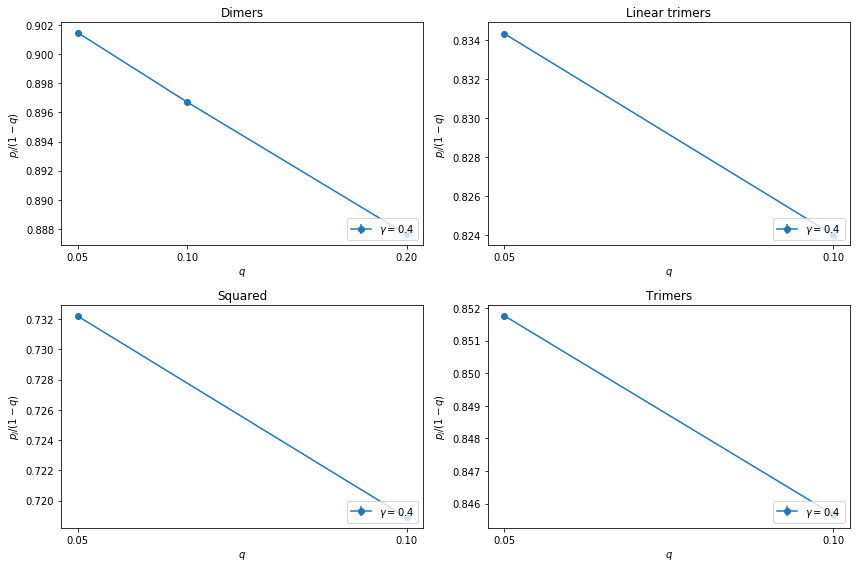

In [9]:
filtered_data = data

splt.oneitem_iterate_errorbar(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: [
        filtered_data[d]['pj_over_1_minus_q_u'],
    ],
    lambda it, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': 'o' }
    ],
    lambda it: (
        plt.title( fr"{it}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$q$" ),
        # splt.hline( 0 ),
        plt.ylabel( fr"$p_j / ( 1 - q )$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "jamming_normalized_witherrors.pdf" )
plt.savefig( savedir + "jamming_normalized_witherrors.png" )

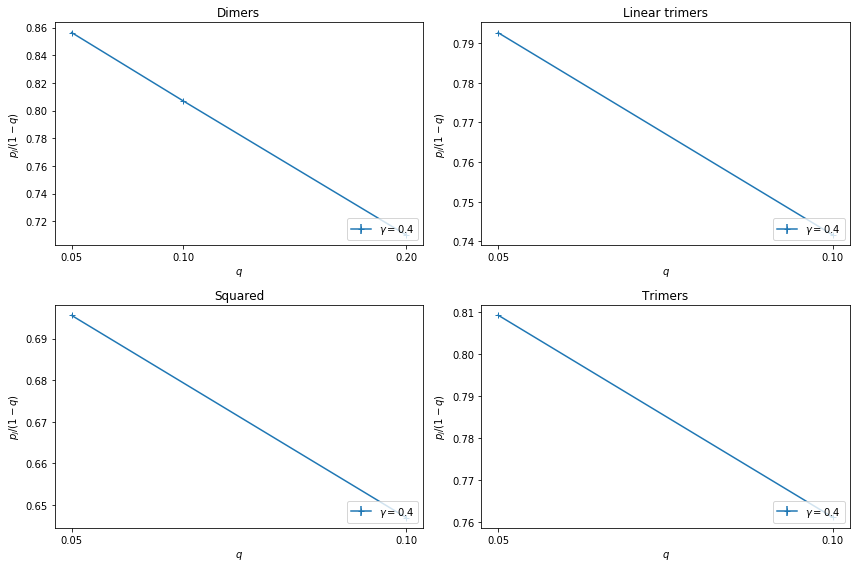

In [10]:
filtered_data = data

splt.oneitem_iterate_errorbar(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: [
        filtered_data[d]['pj_u'],
    ],
    lambda it, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': '+' }
    ],
    lambda it: (
        plt.title( fr"{it}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$q$" ),
        # splt.hline( 0 ),
        plt.ylabel( fr"$p_j / ( 1 - q )$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "jamming_witherrors.pdf" )
plt.savefig( savedir + "jamming_witherrors.png" )